In [1]:
import pandas as pd
import numpy as np

file = 'c2e1results.csv'
df = pd.read_csv(file)

df.head()

,Index,Speaker,Section,Scene,Category,Character,text,pred,label,score,anger,disgust,fear,joy,neutral,sadness,surprise
0,142,SAM,Part One,1,Dialogue,NOTT,"Oh! You're finally awake, I see.",6,surprise,0.877123,0.029428,0.018477,0.004126,0.034323,0.031333,0.005189,0.877123
1,144,SAM,Part One,1,Dialogue,NOTT,"You were out for quite some time, there. Rough...",4,neutral,0.802743,0.010214,0.079111,0.060549,0.007528,0.802743,0.030531,0.009323
2,145,LIAM,Part One,1,Dialogue,CALEB,"Not our best day, no.",5,sadness,0.581246,0.031540,0.079213,0.259437,0.003840,0.041202,0.581246,0.003522
3,146,SAM,Part One,1,Dialogue,NOTT,"No, I mean, usually you're so good at everythi...",4,neutral,0.775355,0.035300,0.117252,0.037986,0.008865,0.775355,0.015268,0.009973
4,147,LIAM,Part One,1,Dialogue,CALEB,Thank you.,4,neutral,0.674990,0.029117,0.015293,0.015141,0.237564,0.674990,0.009810,0.018085


In [2]:
vad_scores = {
    "anger": np.array([-0.43, 0.67, 0.34]),
    "joy": np.array([0.76, 0.48, 0.35]),
    "surprise": np.array([0.4, 0.67, -0.13]),
    "disgust": np.array([-0.6, 0.35, 0.11]),
    "fear": np.array([-0.64, 0.6, -0.43]),
    "sadness": np.array([-0.63, 0.27, -0.33]),
}

emotion_columns = ["anger", "joy", "surprise", "disgust", "fear", "sadness"]

In [3]:
def calculate_weighted_vad(row, vad_scores, emotion_columns):

    weighted_vad = np.zeros(3)

    for emotion in emotion_columns:
        weighted_vad += row[emotion] * vad_scores[emotion]

    return weighted_vad


In [5]:
df["weighted_vad"] = df.apply(calculate_weighted_vad, axis=1, args=(vad_scores, emotion_columns))
df[["text", "weighted_vad"]].head()

,text,weighted_vad
0,"Oh! You're finally awake, I see.","[0.34728502656999993, 0.6342082620299999, -0.0..."
1,"You were out for quite some time, there. Rough...","[-0.10039404137499999, 0.08896522762, -0.02251..."
2,"Not our best day, no.","[-0.5889876243159999, 0.365657874152, -0.28304..."
3,"No, I mean, usually you're so good at everythi...","[-0.10873385381, 0.10254064538999999, 0.005333..."
4,Thank you.,"[0.15021594365000002, 0.16274194829000002, 0.0..."


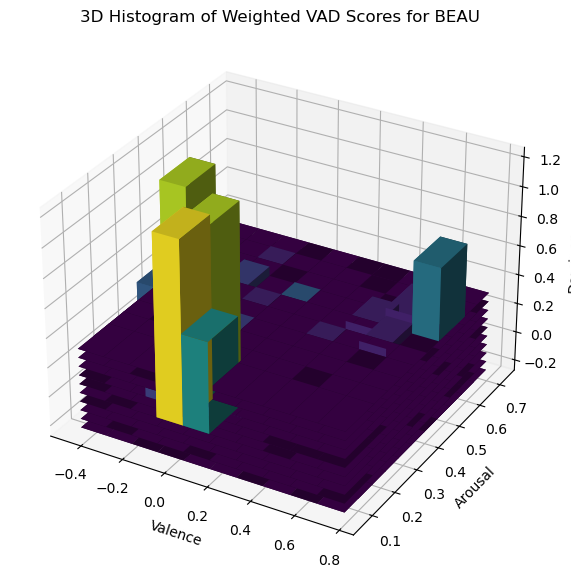

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Filter the dataframe for rows where the character is "BEAU"
beau_data = df[df["Character"] == "BEAU"]

# Extract the weighted VAD values for "BEAU"
vad_values = np.array(beau_data["weighted_vad"].tolist())

# Separate the VAD components
valence = vad_values[:, 0]
arousal = vad_values[:, 1]
dominance = vad_values[:, 2]

# Create a 3D histogram
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Number of bins for the histogram
bins = 10

# Plot the histogram
hist, edges = np.histogramdd((valence, arousal, dominance), bins=bins)

# Get the centers of the bins for plotting
xpos, ypos, zpos = np.meshgrid(
    edges[0][:-1] + np.diff(edges[0]) / 2,
    edges[1][:-1] + np.diff(edges[1]) / 2,
    edges[2][:-1] + np.diff(edges[2]) / 2,
    indexing="ij",
)

# Flatten the arrays for plotting
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = zpos.ravel()
values = hist.ravel()

# Define the size of the bars
dx = dy = dz = np.ones_like(values) * (edges[0][1] - edges[0][0])

# Create a color map based on the counts
colors = plt.cm.viridis(values / values.max())

# Plot the 3D histogram
ax.bar3d(xpos, ypos, zpos, dx, dy, dz * values, color=colors, zsort="average")

# Set labels and title
ax.set_xlabel("Valence")
ax.set_ylabel("Arousal")
ax.set_zlabel("Dominance")
ax.set_title("3D Histogram of Weighted VAD Scores for BEAU")

plt.show()


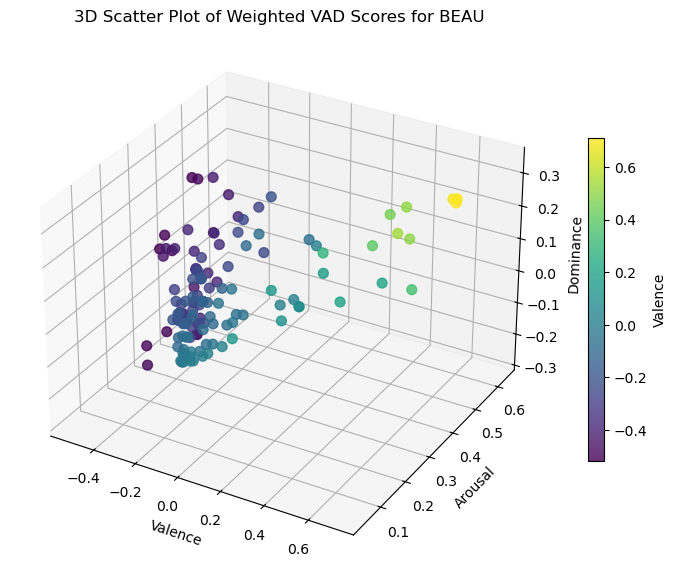

In [8]:
fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(111, projection='3d')



# Scatter plot of VAD values

sc = ax.scatter(valence, arousal, dominance, c=valence, cmap='viridis', s=50, alpha=0.8)



# Add color bar to indicate the valence values

cb = fig.colorbar(sc, ax=ax, shrink=0.6)

cb.set_label("Valence")



# Set axis labels and title

ax.set_xlabel("Valence")

ax.set_ylabel("Arousal")

ax.set_zlabel("Dominance")

ax.set_title("3D Scatter Plot of Weighted VAD Scores for BEAU")



plt.show()

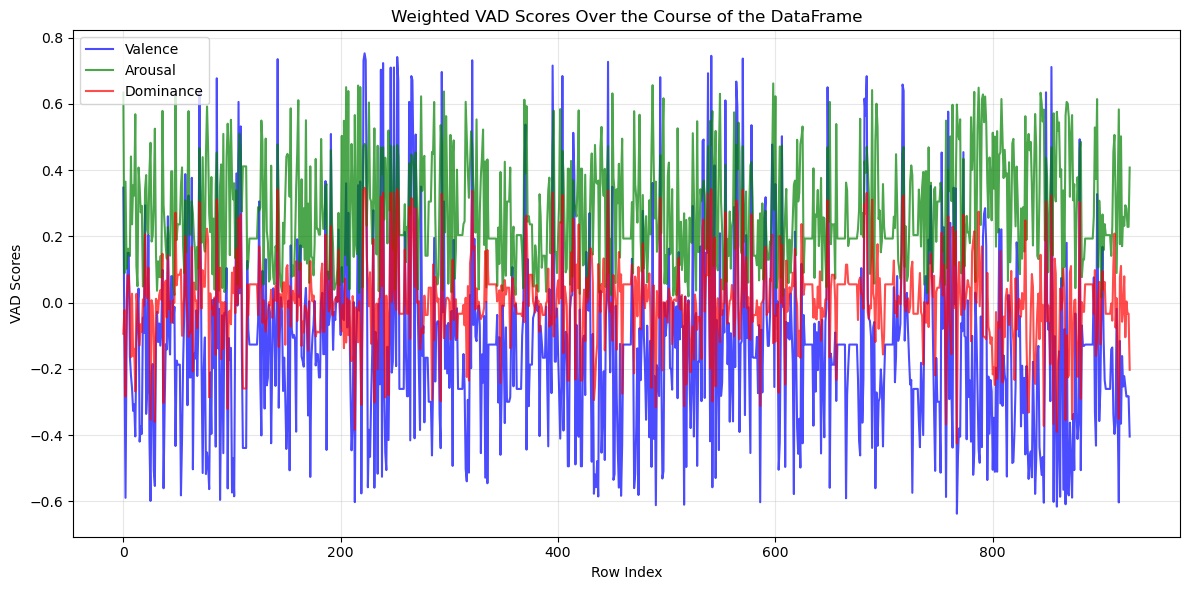

In [9]:
import matplotlib.pyplot as plt

# Extract weighted VAD values into separate lists
vad_values = np.array(df["weighted_vad"].tolist())
valence = vad_values[:, 0]
arousal = vad_values[:, 1]
dominance = vad_values[:, 2]

# Create a sequential index for plotting
x = df.index

# Plot the VAD scores over the dataframe
plt.figure(figsize=(12, 6))
plt.plot(x, valence, label="Valence", color="blue", alpha=0.7)
plt.plot(x, arousal, label="Arousal", color="green", alpha=0.7)
plt.plot(x, dominance, label="Dominance", color="red", alpha=0.7)

# Add labels, title, and legend
plt.xlabel("Row Index")
plt.ylabel("VAD Scores")
plt.title("Weighted VAD Scores Over the Course of the DataFrame")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


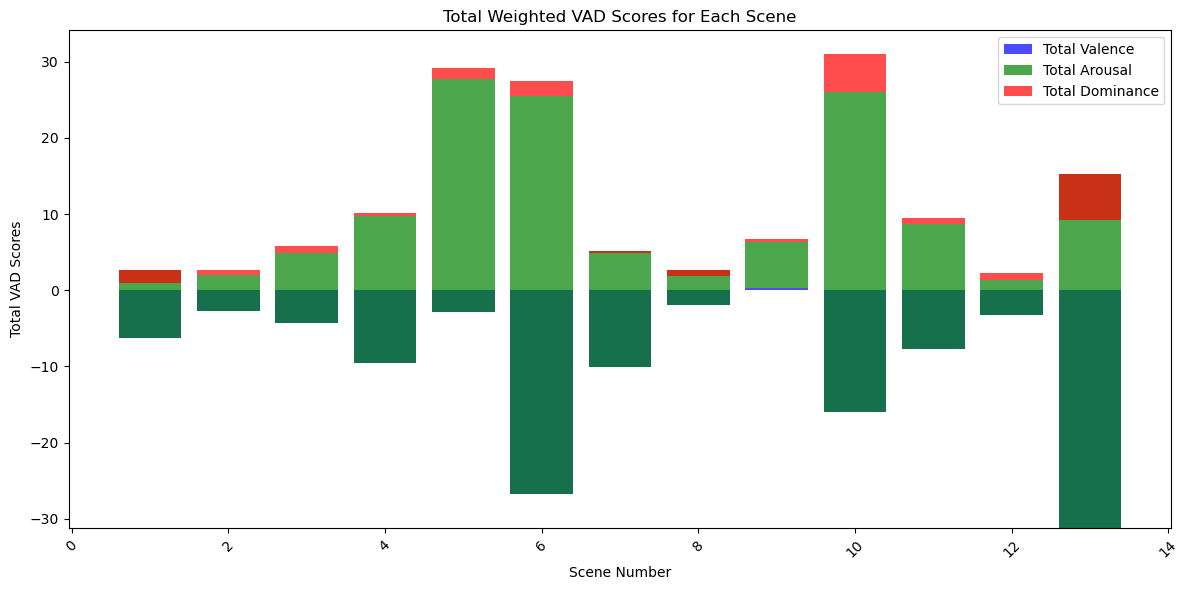

In [10]:
scene_vad_totals = (
    df.groupby("Scene")["weighted_vad"]
    .apply(lambda x: np.sum(np.array(x.tolist()), axis=0))
)

# Convert the results into separate arrays for valence, arousal, and dominance
scenes = scene_vad_totals.index
total_vad = np.array(scene_vad_totals.tolist())
valence = total_vad[:, 0]
arousal = total_vad[:, 1]
dominance = total_vad[:, 2]

# Plot the total VAD scores for each scene
plt.figure(figsize=(12, 6))
plt.bar(scenes, valence, label="Total Valence", color="blue", alpha=0.7)
plt.bar(scenes, arousal, label="Total Arousal", color="green", alpha=0.7, bottom=valence)
plt.bar(
    scenes,
    dominance,
    label="Total Dominance",
    color="red",
    alpha=0.7,
    bottom=valence + arousal,
)

# Add labels, title, and legend
plt.xlabel("Scene Number")
plt.ylabel("Total VAD Scores")
plt.title("Total Weighted VAD Scores for Each Scene")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

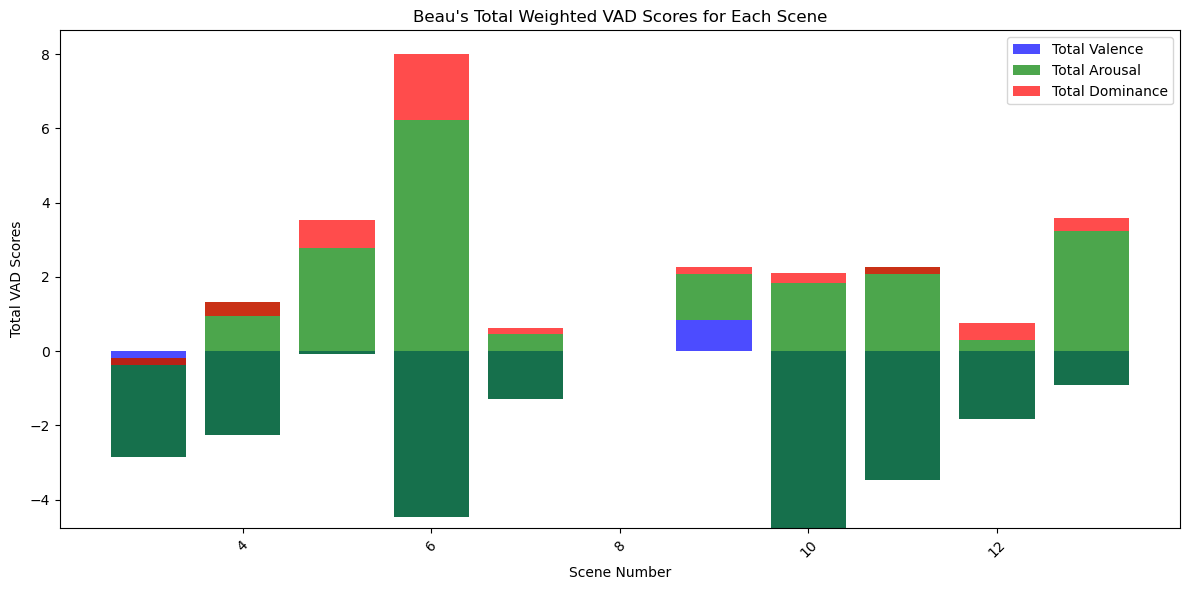

In [11]:
# Filter the dataframe for rows where the character is "BEAU"
beau_data = df[df["Character"] == "BEAU"]

# Group by 'Scene' and compute the total vector score for Beau in each scene
beau_scene_vad_totals = (
    beau_data.groupby("Scene")["weighted_vad"]
    .apply(lambda x: np.sum(np.array(x.tolist()), axis=0))
)

# Convert the results into separate arrays for valence, arousal, and dominance
scenes = beau_scene_vad_totals.index
total_vad = np.array(beau_scene_vad_totals.tolist())
valence = total_vad[:, 0]
arousal = total_vad[:, 1]
dominance = total_vad[:, 2]

# Plot Beau's total VAD scores for each scene
plt.figure(figsize=(12, 6))
plt.bar(scenes, valence, label="Total Valence", color="blue", alpha=0.7)
plt.bar(scenes, arousal, label="Total Arousal", color="green", alpha=0.7, bottom=valence)
plt.bar(
    scenes,
    dominance,
    label="Total Dominance",
    color="red",
    alpha=0.7,
    bottom=valence + arousal,
)

# Add labels, title, and legend
plt.xlabel("Scene Number")
plt.ylabel("Total VAD Scores")
plt.title("Beau's Total Weighted VAD Scores for Each Scene")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

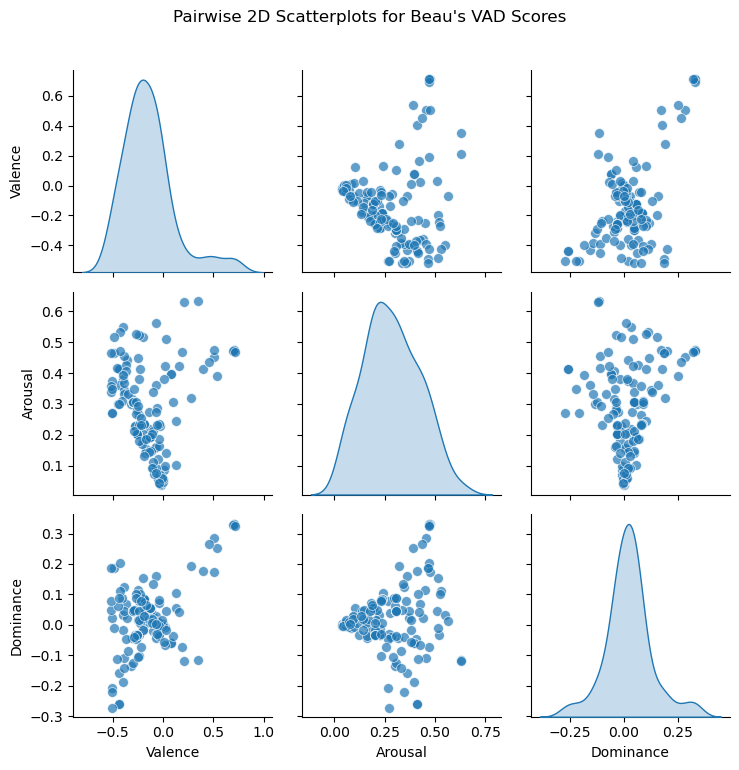

In [12]:
import seaborn as sns
import pandas as pd

# Filter the dataframe for rows where the character is "BEAU"
beau_data = df[df["Character"] == "BEAU"]

# Extract weighted VAD values into a new DataFrame for Beau
vad_values = pd.DataFrame(beau_data["weighted_vad"].tolist(), columns=["Valence", "Arousal", "Dominance"])

# Use seaborn's pairplot to create pairwise scatterplots
sns.pairplot(vad_values, diag_kind="kde", plot_kws={"alpha": 0.7, "s": 50})

# Add title to the plot
plt.suptitle("Pairwise 2D Scatterplots for Beau's VAD Scores", y=1.02)
plt.tight_layout()

# Show the plot
plt.show()

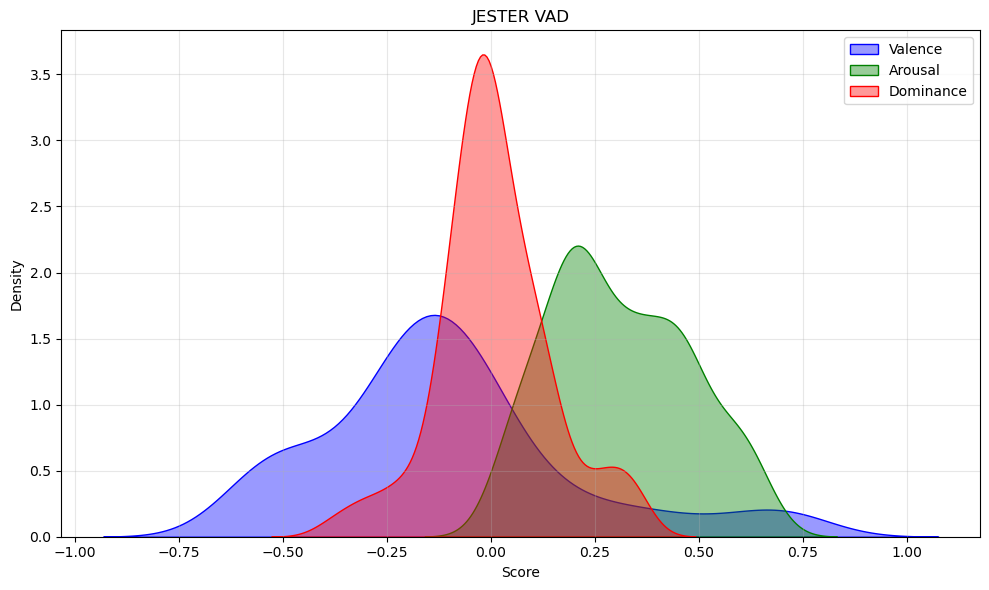

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for rows where the character is "BEAU"
jester_data = df[df["Character"] == "JESTER"]

# Extract weighted VAD values into separate arrays for valence, arousal, and dominance
vad_values = np.array(jester_data["weighted_vad"].tolist())
valence = vad_values[:, 0]
arousal = vad_values[:, 1]
dominance = vad_values[:, 2]

# Create a KDE plot for each VAD component
plt.figure(figsize=(10, 6))
sns.kdeplot(valence, label="Valence", color="blue", fill=True, alpha=0.4)
sns.kdeplot(arousal, label="Arousal", color="green", fill=True, alpha=0.4)
sns.kdeplot(dominance, label="Dominance", color="red", fill=True, alpha=0.4)

# Add labels, title, and legend
plt.xlabel("Score")
plt.ylabel("Density")
plt.title("JESTER VAD")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

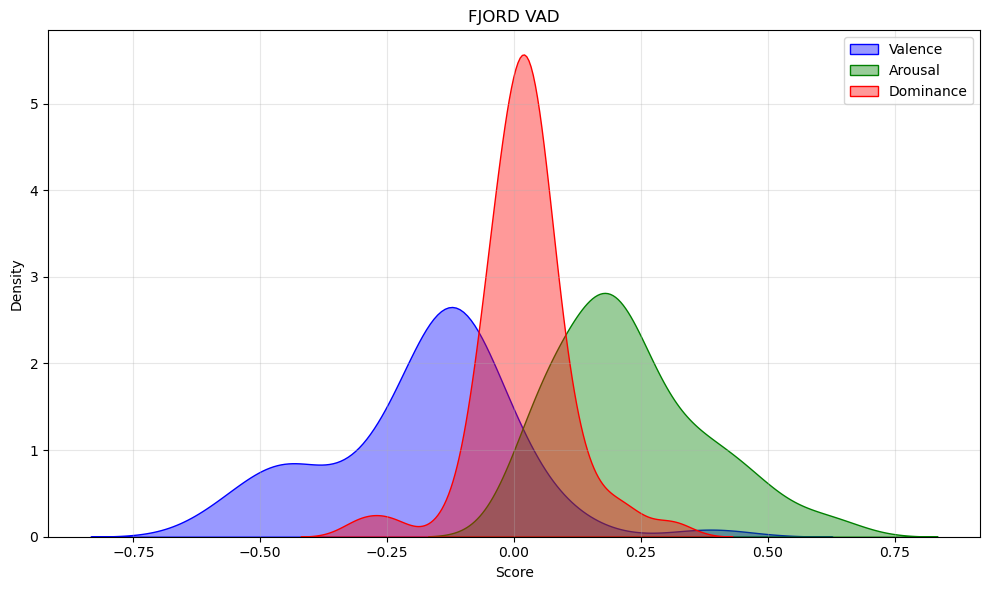

In [17]:
fjord_data = df[df["Character"] == "FJORD"]

# Extract weighted VAD values into separate arrays for valence, arousal, and dominance
vad_values = np.array(fjord_data["weighted_vad"].tolist())
valence = vad_values[:, 0]
arousal = vad_values[:, 1]
dominance = vad_values[:, 2]

# Create a KDE plot for each VAD component
plt.figure(figsize=(10, 6))
sns.kdeplot(valence, label="Valence", color="blue", fill=True, alpha=0.4)
sns.kdeplot(arousal, label="Arousal", color="green", fill=True, alpha=0.4)
sns.kdeplot(dominance, label="Dominance", color="red", fill=True, alpha=0.4)

# Add labels, title, and legend
plt.xlabel("Score")
plt.ylabel("Density")
plt.title("FJORD VAD")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()